# **Introdução**


# **Análise Exploratória dos Dados**

##### Importação das bibliotecas


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

##### Carregamento das bases de treino e teste

In [75]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv') 

#### Estrutura do Dataset

**Análise Descritiva**


In [76]:
train_data.describe()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
count,646.000000,611.000000,637.000000,508.000000,535.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,...,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,461.577399,2.341718,4.037724,3.352657,4.944729,7.948916,2.351393,2.949633e+07,1.913313,0.546440,...,0.003096,0.304954,0.329721,0.260062,0.515480,0.419505,0.235294,0.091331,2.848655,0.647059
std,264.859464,2.468275,2.950923,2.866952,3.213319,7.397602,1.357856,2.261999e+08,1.337095,0.498224,...,0.055598,0.460745,0.470476,0.439008,0.500148,0.493860,0.424511,0.288303,1.894050,0.478255
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,233.250000,0.680000,1.870000,1.185000,2.540000,3.000000,1.000000,3.000000e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000
50%,459.500000,1.650000,3.610000,2.785000,4.620000,6.000000,2.000000,1.020000e+07,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000
75%,692.500000,3.600000,5.590000,4.935000,6.880000,10.000000,3.000000,2.587500e+07,3.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000
max,923.000000,21.900000,21.900000,24.680000,24.680000,63.000000,8.000000,5.700000e+09,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


A tabela acima mostra as estatísticas descritivas do conjunto de dados. Algumas informações importantes são: 

- **Idade e marcos:** as colunas de idade em relação ao primeiro/último financiamento e ao primeiro/último marco apresentam valores médios entre 2 e 5 anos, mas com grande variação (máximo chegando a mais de 20 anos). Isso indica que existem tanto startups muito jovens quanto outras mais consolidadas.
- **Relacionamentos e rodadas de investimento:** em média, cada empresa tem cerca de 8 relacionamentos e 2,3 rodadas de financiamento. O máximo observado foi de 63 relacionamentos e 8 rodadas, mostrando casos de alto networking e captação recorrente.
- **Financiamento total:** há uma grande dispersão em funding_total_usd. O valor médio é em torno de 29 milhões de dólares, mas o desvio padrão é muito alto, chegando a um máximo de 5,7 bilhões. Isso sugere forte assimetria e presença de outliers.
- **Milestones:** a média de marcos atingidos é próxima de 2, com máximo de 6.
- **Variáveis binárias:** indicam se a empresa pertence a determinada categoria ou atingiu uma rodada específica. A média desses campos mostra a proporção de empresas que se enquadram em cada caso. Por exemplo, cerca de 55% são da Califórnia (is_CA), 33% receberam investimento de venture capital (has_VC) e 51% chegaram à rodada A (has_roundA).
- **Participantes médios:** a média é de 2,8 investidores por rodada, com máximo de 16.
- **Labels:** aproximadamente 65% das observações têm rótulo positivo (1).

Em resumo, os dados revelam grande heterogeneidade entre as empresas, especialmente no volume de financiamento. Também fica claro que uma parcela significativa das startups passou por rodadas iniciais de captação (seed e A), mas poucas alcançaram rodadas mais avançadas (C ou D).

**Informações do Dataset**

In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        646 non-null    int64  
 1   age_first_funding_year    611 non-null    float64
 2   age_last_funding_year     637 non-null    float64
 3   age_first_milestone_year  508 non-null    float64
 4   age_last_milestone_year   535 non-null    float64
 5   relationships             646 non-null    int64  
 6   funding_rounds            646 non-null    int64  
 7   funding_total_usd         646 non-null    int64  
 8   milestones                646 non-null    int64  
 9   is_CA                     646 non-null    int64  
 10  is_NY                     646 non-null    int64  
 11  is_MA                     646 non-null    int64  
 12  is_TX                     646 non-null    int64  
 13  is_otherstate             646 non-null    int64  
 14  category_c

AO dataset possui 646 entradas e 33 colunas. A maior parte das variáveis é numérica (`int64` ou `float64`), representando quantidades (ex.: número de rodadas de investimento, relacionamentos, marcos) ou indicadores binários (ex.: "is_CA", "has_VC"). Apenas a coluna "category_code" está no formato `object`, pois representa categorias de empresas em texto. Também é possível notar que algumas colunas do tipo `float64` possuem valores nulos, como "age_first_funding_year", "age_last_funding_year" e "age_first_milestone_year", o que pode exigir tratamento posterior.

**Registros de Amostra**

In [78]:
train_data.head()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,...,0,0,1,1,0,0,0,0,1.0,0
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,...,0,0,0,0,0,1,0,0,1.0,1
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,...,0,1,1,0,1,0,0,0,1.0,0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,...,0,0,0,1,0,1,0,0,2.0,1
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,...,0,0,0,0,1,1,1,1,2.8,1


**Dimensões e Estrutura do Dataset**

In [79]:
train_data.shape

(646, 33)

##### Colunas

In [80]:
train_data.columns

Index(['id', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'labels'],
      dtype='object')

- **id** (`int64`) → Identificador único da startup no dataset.  

**Variável alvo**
- **labels** (`int64`) → Indicador de sucesso:  
  - **1** = startup bem-sucedida (ativa/adquirida).  
  - **0** = startup fechada/insucesso.  
  - **Distribuição**: ~65% sucesso, ~35% insucesso.  

**Idades relativas (anos desde a fundação até o evento)** 
- **age_first_funding_year** (`float64`) → Anos até o primeiro funding (≥ 0 ou NaN).  
- **age_last_funding_year** (`float64`) → Anos até o último funding (≥ 0 ou NaN).  
- **age_first_milestone_year** (`float64`) → Anos até o primeiro marco relevante (muitos NaN).  
- **age_last_milestone_year** (`float64`) → Anos até o último marco relevante (muitos NaN).  

**Estrutura, histórico e escala de captação**
- **relationships** (`int64`) → Número de relacionamentos (fundadores, executivos, investidores).  
- **funding_rounds** (`int64`) → Número de rodadas de captação.  
- **funding_total_usd** (`float64`) → Total captado em dólares (valores extremos tratados).  
- **milestones** (`int64`) → Quantidade de marcos relevantes registrados.  
- **avg_participants** (`float64`) → Média de investidores por rodada de funding.  

**Localização (variáveis binárias)** 
- **is_CA**, **is_NY**, **is_MA**, **is_TX**, **is_otherstate** (`int64`) → Indicam o estado-sede da startup (Califórnia, Nova Iorque, Massachusetts, Texas ou Outros).  

**Setor/mercado**
- **category_code** (`object`) → Setor principal declarado da startup (string).  
- **is_software**, **is_web**, **is_mobile**, **is_enterprise**, **is_advertising**, **is_gamesvideo**, **is_ecommerce**, **is_biotech**, **is_consulting**, **is_othercategory** (`int64`) → Indicadores de setor em formato binário (0/1).  

**Sinalizadores de financiamento**
- **has_VC** (`int64`) → Recebeu **venture capital**? (0/1).  
- **has_angel** (`int64`) → Recebeu **investimento anjo**? (0/1).  
- **has_roundA**, **has_roundB**, **has_roundC**, **has_roundD** (`int64`) → Indicam se a startup chegou até cada rodada de funding específica.  

In [81]:
train_data['labels'].value_counts()

labels
1    418
0    228
Name: count, dtype: int64

In [82]:
print(f"Taxa de sucesso: {train_data['labels'].mean():.2%}")

Taxa de sucesso: 64.71%


#### Identificação das variáveis

As variáveis do dataset foram separadas em três grupos: **numéricas contínuas**, **categóricas** e **binárias**. Essa distinção é importante porque cada tipo de variável demanda um tratamento específico durante a análise e a modelagem.

In [83]:
# Variáveis contínuas
num_continuous = [
    "age_first_funding_year", "age_last_funding_year",
    "age_first_milestone_year", "age_last_milestone_year",
    "funding_total_usd", "avg_participants"
]

# Variáveis discretas de contagem
num_discrete = ["relationships", "funding_rounds", "milestones"]

# Variáveis categóricas nominais
cat_nominal = ["category_code"]

# Variáveis binárias (dummies)
cat_binary = [
    "is_CA", "is_NY", "is_MA", "is_TX", "is_otherstate",
    "is_software", "is_web", "is_mobile", "is_enterprise",
    "is_advertising", "is_gamesvideo", "is_ecommerce", "is_biotech",
    "is_consulting", "is_othercategory",
    "has_VC", "has_angel", "has_roundA", "has_roundB",
    "has_roundC", "has_roundD"
]

# Variável alvo
target = ["labels"]

# **Limpeza dos Dados**

### Tratamento de Valores Nulos

A ausência de dados pode afetar o desempenho e a qualidade das previsões, além de indicar possíveis vieses. Assim, foi realizada uma verificação da quantidade e proporção de valores ausentes em cada variável, para então definir a estratégia de tratamento adequada.

In [84]:
# --- Valores nulos no treino ---
null_train = train_data.isnull().sum()
null_train_pct = (null_train / len(train_data)) * 100

df_train = pd.DataFrame({
    "Nulos Treino (Qtd)": null_train,
    "Nulos Treino (%)": null_train_pct
})

# Filtrar apenas colunas com nulos
df_train = df_train[df_train["Nulos Treino (Qtd)"] > 0] \
    .sort_values(by="Nulos Treino (%)", ascending=False)

print("Valores nulos no conjunto de TREINO:")
display(df_train)

# --- Valores nulos no teste ---
null_test = test_data.isnull().sum()
null_test_pct = (null_test / len(test_data)) * 100

df_test = pd.DataFrame({
    "Nulos Teste (Qtd)": null_test,
    "Nulos Teste (%)": null_test_pct
})

# Filtrar apenas colunas com nulos
df_test = df_test[df_test["Nulos Teste (Qtd)"] > 0] \
    .sort_values(by="Nulos Teste (%)", ascending=False)

print("Valores nulos no conjunto de TESTE:")
display(df_test)

Valores nulos no conjunto de TREINO:


,Nulos Treino (Qtd),Nulos Treino (%)
age_first_milestone_year,138,21.362229
age_last_milestone_year,111,17.182663
age_first_funding_year,35,5.417957
age_last_funding_year,9,1.393189


Valores nulos no conjunto de TESTE:


,Nulos Teste (Qtd),Nulos Teste (%)
age_first_milestone_year,60,21.660650
age_last_milestone_year,53,19.133574
age_first_funding_year,11,3.971119
age_last_funding_year,4,1.444043


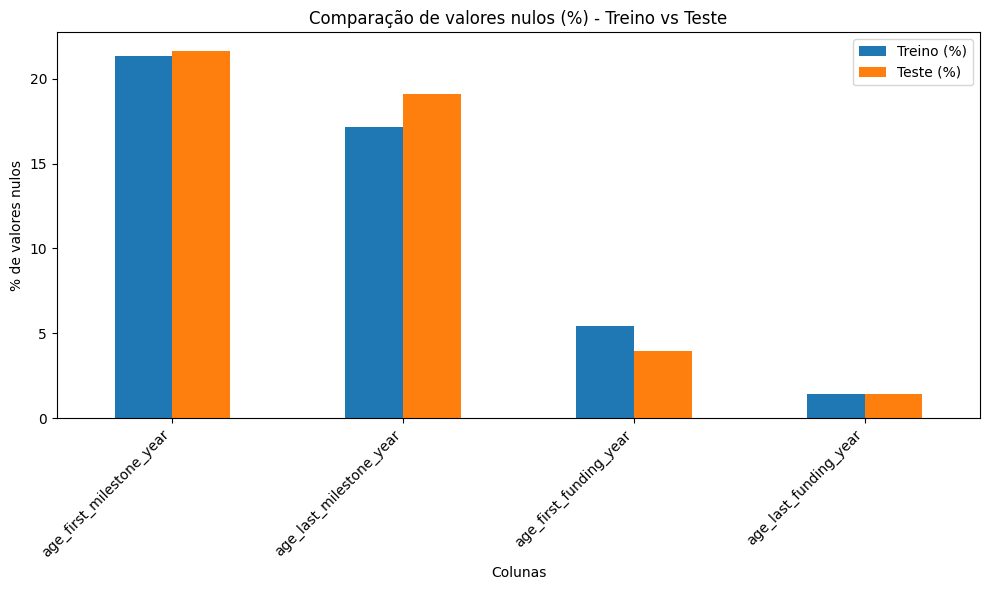

In [85]:
df_compare = pd.DataFrame({
    "Treino (%)": null_train_pct,
    "Teste (%)": null_test_pct
}).fillna(0)

# Filtrar apenas colunas com valores nulos em treino ou teste
df_compare = df_compare[(df_compare["Treino (%)"] > 0) | (df_compare["Teste (%)"] > 0)]

# Ordenar por treino (decrescente)
df_compare = df_compare.sort_values(by="Treino (%)", ascending=False)

# Gráfico
df_compare.plot(kind="bar", figsize=(10,6))
plt.title("Comparação de valores nulos (%) - Treino vs Teste")
plt.ylabel("% de valores nulos")
plt.xlabel("Colunas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

A análise revelou a presença de valores nulos concentrados em variáveis relacionadas a eventos temporais (`age_*`). As proporções de dados ausentes são semelhantes entre treino e teste, o que sugere consistência no padrão de missing. Essas variáveis serão tratadas diretamente no pipeline de pré-processamento, garantindo que o mesmo processo de imputação seja aplicado tanto no treinamento quanto em dados novos, evitando vazamento de informação.

### Duplicatas

In [86]:
print(train_data.duplicated().sum(),'duplicatas')
print(test_data.duplicated().sum(),'duplicatas')

0 duplicatas
0 duplicatas


O código acima verifica a existência de linhas duplicadas na base de dados, como não existem, segue-se a limpeza.

### Outliers

In [87]:
# Selecionar apenas colunas numéricas
numeric_cols = train_data.select_dtypes(include=[np.number]).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Contar outliers
    n_outliers = ((train_data[col] < lower) | (train_data[col] > upper)).sum()
    pct_outliers = n_outliers / len(train_data) * 100
    
    if n_outliers > 0:  # salvar só colunas que têm outliers
        outlier_summary[col] = {
            "Qtd Outliers": n_outliers,
            "% Outliers": round(pct_outliers, 2)
        }

df_outliers = pd.DataFrame(outlier_summary).T.sort_values("% Outliers", ascending=False)

print("Resumo de outliers por variável (IQR):")
display(df_outliers)

Resumo de outliers por variável (IQR):


,Qtd Outliers,% Outliers
has_roundC,152.0,23.53
is_otherstate,136.0,21.05
is_software,105.0,16.25
is_web,97.0,15.02
is_NY,71.0,10.99
is_mobile,65.0,10.06
is_MA,61.0,9.44
has_roundD,59.0,9.13
is_enterprise,53.0,8.20
funding_total_usd,50.0,7.74


A aplicação do método do Intervalo Interquartil (IQR) revelou a presença de valores atípicos em diversas variáveis. A análise desses resultados distingue os "falsos positivos" (outliers não problemáticos) e outliers verdadeiros (que podem interferir na modelagem).


**1. Falsos Outliers (Variáveis Binárias)**

| Variável | Característica | Implicação |
|----------|----------------|------------|
| has_roundC, is_otherstate, is_software, is_web | Variáveis binárias (0 ou 1) com alta proporção de "outliers". | Não preocupante. O método IQR não é adequado para este tipo de variável, gerando falsos positivos (artefatos do cálculo). Esses valores não serão tratados. |


**2. Outliers Relevantes (Variáveis Financeiras e de Atividade)**

Os outliers observados nestas variáveis são significativos e refletem características reais e valiosas das empresas.

| Variável | Proporção de Outliers | Interpretação e Recomendação de Tratamento |
|----------|---------------------|-------------------------------------------|
| funding_total_usd | 7,7% | Representam empresas que receberam rodadas de investimento excepcionais. |
| relationships | 7,3% | Indicam empresas com redes de contato ou parcerias muito acima da média do grupo. |

**Recomendação:** Estes valores são informações valiosas sobre o sucesso ou a dimensão das startups e não devem ser simplesmente removidos. O tratamento ideal deve focar em reduzir o impacto da escala sem perder a informação, por meio de:  

- **Transformações Logarítmicas:** Para normalizar a distribuição e mitigar a influência dos valores extremos.  
- **Modelos Robustos:** Utilização de algoritmos de machine learning que são menos sensíveis a outliers.  


**3. Outliers em Métricas de Rodadas e Idade**

Outras métricas apresentaram um nível de outliers mais gerenciável, mas que também merecem atenção.

- **Métricas de Rodadas (<3% de outliers):** Variáveis como `funding_rounds` e `avg_participants` refletem startups com um histórico de captação de investimento ou um padrão de participação em rodadas incomum. O tratamento via transformação logarítmica também é recomendado.

- **Variáveis de Idade (<2% de outliers):** O baixo percentual de valores atípicos nas variáveis `age_*` sugere que a idade das empresas está, em geral, bem distribuída, necessitando de intervenção mínima.


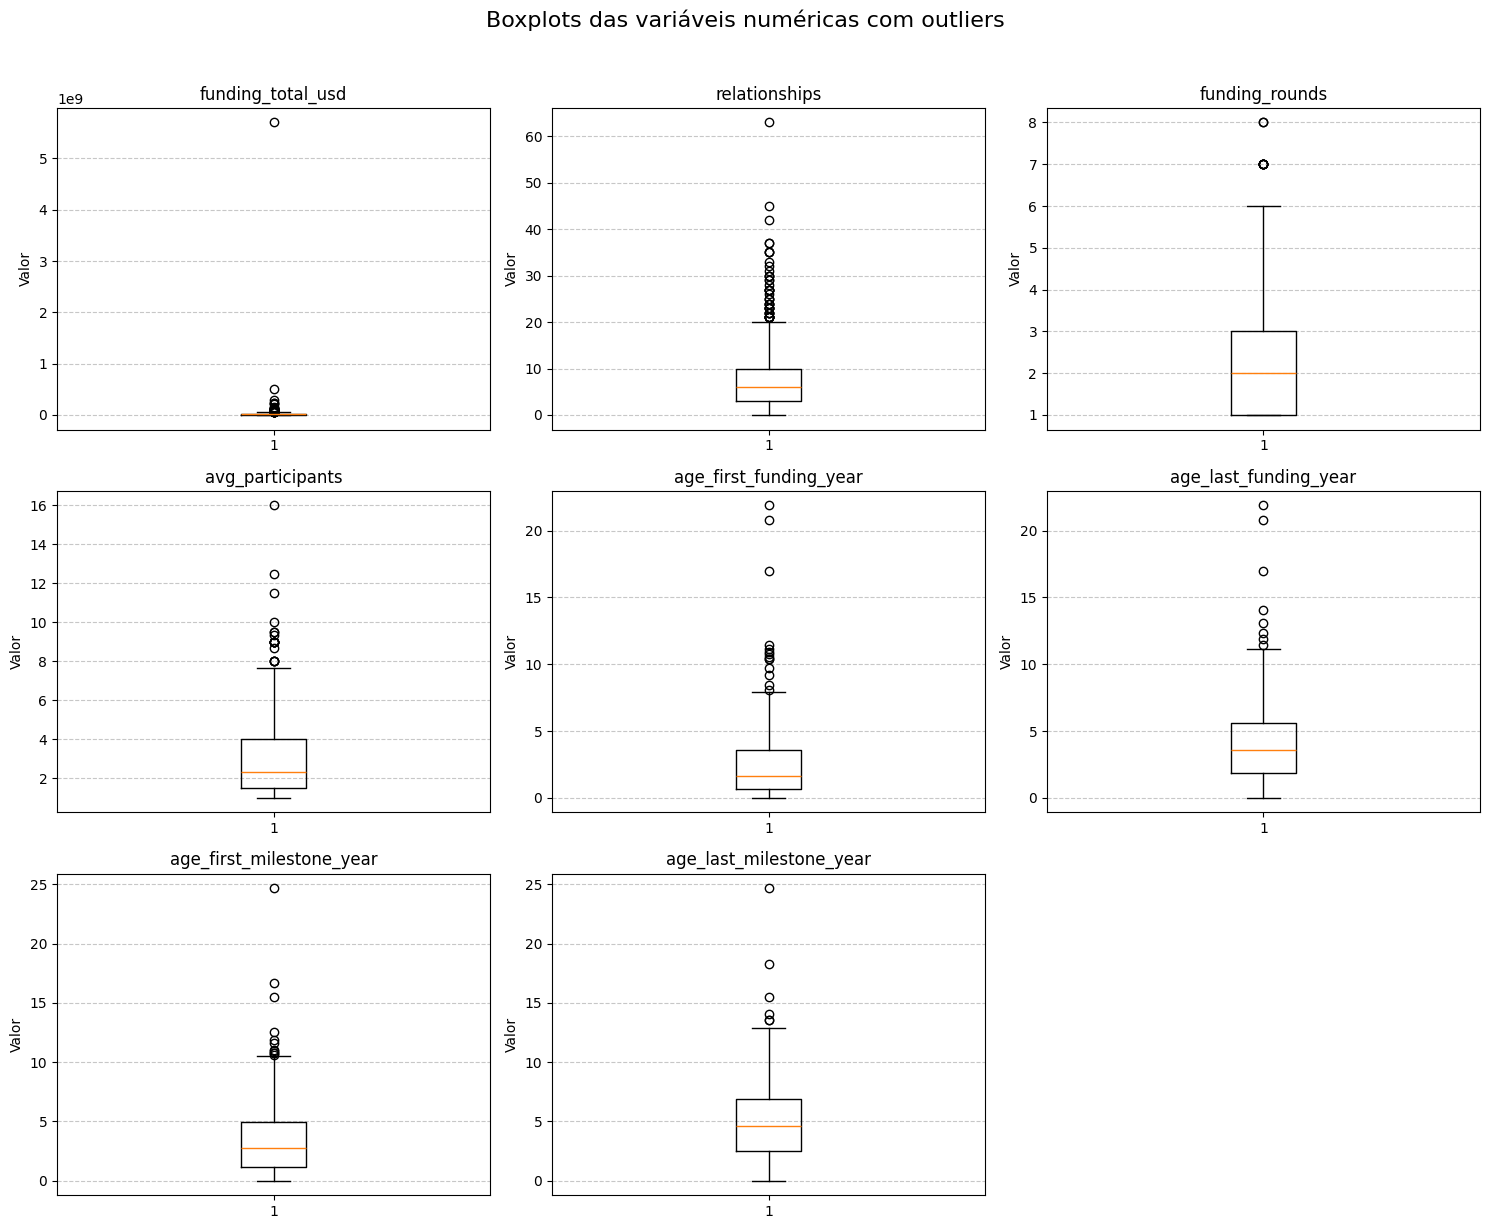

In [88]:
# Selecionar colunas com outliers reais (tirando as binárias)
cols_outliers = [
    "funding_total_usd",
    "relationships",
    "funding_rounds",
    "avg_participants",
    "age_first_funding_year",
    "age_last_funding_year",
    "age_first_milestone_year",
    "age_last_milestone_year"
]

# Plotar boxplots
n_cols = 3
n_rows = int(np.ceil(len(cols_outliers) / n_cols))

plt.figure(figsize=(15, n_rows*4))

for i, col in enumerate(cols_outliers, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(train_data[col].dropna(), vert=True)
    plt.title(col)
    plt.ylabel("Valor")
    plt.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.suptitle("Boxplots das variáveis numéricas com outliers", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# **Pré-processamento**

### Feature Engineering

In [89]:
# 1. funding_duration
train_data["funding_duration"] = (train_data["age_last_funding_year"] - train_data["age_first_funding_year"]).fillna(0)
test_data["funding_duration"]  = (test_data["age_last_funding_year"] - test_data["age_first_funding_year"]).fillna(0)

# 2. relationships_per_round
train_data["relationships_per_round"] = train_data["relationships"] / (train_data["funding_rounds"] + 1)
test_data["relationships_per_round"]  = test_data["relationships"] / (test_data["funding_rounds"] + 1)

# 3. maturity_score
for col in ["funding_rounds", "relationships", "milestones"]:
    max_val = train_data[col].max()  # usa apenas o train para evitar leakage
    train_data[f"{col}_norm"] = train_data[col] / max_val if max_val > 0 else 0
    test_data[f"{col}_norm"]  = test_data[col] / max_val if max_val > 0 else 0

train_data["maturity_score"] = (
    train_data["funding_rounds_norm"] * 0.4 +
    train_data["relationships_norm"] * 0.3 +
    train_data["milestones_norm"] * 0.3
)
test_data["maturity_score"] = (
    test_data["funding_rounds_norm"] * 0.4 +
    test_data["relationships_norm"] * 0.3 +
    test_data["milestones_norm"] * 0.3
)

# 4. avg_funding_per_round
train_data["avg_funding_per_round"] = train_data["funding_total_usd"] / (train_data["funding_rounds"] + 1)
test_data["avg_funding_per_round"]  = test_data["funding_total_usd"] / (test_data["funding_rounds"] + 1)


In [90]:
train_data["funding_per_relationship"] = train_data["funding_total_usd"] / (train_data["relationships"] + 1)
test_data["funding_per_relationship"]  = test_data["funding_total_usd"] / (test_data["relationships"] + 1)

train_data["milestones_per_year"] = train_data["milestones"] / (train_data["funding_duration"] + 1)
test_data["milestones_per_year"]  = test_data["milestones"] / (test_data["funding_duration"] + 1)

train_data["participants_per_round"] = train_data["avg_participants"] / (train_data["funding_rounds"] + 1)
test_data["participants_per_round"]  = test_data["avg_participants"] / (test_data["funding_rounds"] + 1)

In [91]:
# multiplicação das top features
train_data["maturity_x_relationships_per_round"] = train_data["maturity_score"] * train_data["relationships_per_round"]
test_data["maturity_x_relationships_per_round"] = test_data["maturity_score"] * test_data["relationships_per_round"]

In [92]:
# divisão do funding médio pelo período de funding
train_data["avg_funding_per_year"] = train_data["avg_funding_per_round"] / (train_data["funding_duration"] + 1)
test_data["avg_funding_per_year"] = test_data["avg_funding_per_round"] / (test_data["funding_duration"] + 1)

In [93]:
# funding ajustado pela maturidade
train_data["funding_maturity_ratio"] = train_data["funding_total_usd"] / (train_data["maturity_score"] + 1e-6)
test_data["funding_maturity_ratio"] = test_data["funding_total_usd"] / (test_data["maturity_score"] + 1e-6)

In [94]:
train_data["participants_per_funding"] = train_data["avg_participants"] / (train_data["funding_rounds"] + 1)
test_data["participants_per_funding"] = test_data["avg_participants"] / (test_data["funding_rounds"] + 1)

### Tratamento e Transformações

Antes de iniciar a modelagem, foi analisada a presença de valores ausentes tanto nos dados de treino quanto de teste. Essa etapa é fundamental para definir a estratégia de tratamento dentro do pipeline de pré-processamento, garantindo que o mesmo processo seja aplicado em qualquer novo conjunto de dados e evitando vazamento de informação.

In [95]:
# --- Variáveis ---
numeric_features = ["age_first_funding_year", "age_last_funding_year",
                    "age_first_milestone_year", "age_last_milestone_year",
                    "relationships", "funding_rounds", "funding_total_usd",
                    "milestones", "avg_participants", "maturity_score", "avg_funding_per_round"]

categorical_features = ["category_code"]

binary_features = ["is_CA", "is_NY", "is_MA", "is_TX", "is_otherstate",
                   "is_software", "is_web", "is_mobile", "is_enterprise",
                   "is_advertising", "is_gamesvideo", "is_ecommerce",
                   "is_biotech", "is_consulting", "is_othercategory",
                   "has_VC", "has_angel", "has_roundA", "has_roundB",
                   "has_roundC", "has_roundD"]

Código para tratamento de outliers testado, mas não aplicado no modelo final, já que não representou nenhuma mudança no modelo. O método utilizado foi Intervalo Interquartil (IQR)

In [96]:
# Tratamento de Outiliers
"""
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
        df_clean = df_clean[mask]
    return df_clean.reset_index(drop=True)

# Exemplo de uso:
train_data = remove_outliers_iqr(train_data, numeric_features)
"""

'\ndef remove_outliers_iqr(df, cols):\n    df_clean = df.copy()\n    for col in cols:\n        Q1 = df_clean[col].quantile(0.25)\n        Q3 = df_clean[col].quantile(0.75)\n        IQR = Q3 - Q1\n        lower_bound = Q1 - 1.5 * IQR\n        upper_bound = Q3 + 1.5 * IQR\n        mask = (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)\n        df_clean = df_clean[mask]\n    return df_clean.reset_index(drop=True)\n\n# Exemplo de uso:\ntrain_data = remove_outliers_iqr(train_data, numeric_features)\n'

In [97]:
# Numéricas sem log
numeric_no_log = list(set(numeric_features))

# --- Transformers ---
numeric_no_log_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

numeric_log_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

binary_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [98]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_no_log", numeric_no_log_transformer, numeric_no_log),
        ("cat", categorical_transformer, categorical_features),
        ("bin", binary_transformer, binary_features)
    ]
)

# **Modelo**

### Passo 1: separar features e target do `train_data`

In [99]:
X_train = train_data.drop("labels", axis=1)  
y_train = train_data["labels"]

# Teste (não tem labels)
X_test = test_data.drop("id", axis=1)  # mantém só as features

### Balanceamento

In [100]:
""""
# --- Oversampling no treino ---
train_majority = train_data[train_data["labels"] == 0]  # classe majoritária
train_minority = train_data[train_data["labels"] == 1]  # classe minoritária

# Aumenta a minoria até o mesmo tamanho da maioria
train_minority_oversampled = resample(
    train_minority,
    replace=True,
    n_samples=len(train_majority),
    random_state=42
)

# Junta classes
train_balanced = pd.concat([train_majority, train_minority_oversampled])

# Embaralha
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# --- Atualizar X_train e y_train balanceados ---
X_train = train_balanced.drop("labels", axis=1)
y_train = train_balanced["labels"]
"""

'"\n# --- Oversampling no treino ---\ntrain_majority = train_data[train_data["labels"] == 0]  # classe majoritária\ntrain_minority = train_data[train_data["labels"] == 1]  # classe minoritária\n\n# Aumenta a minoria até o mesmo tamanho da maioria\ntrain_minority_oversampled = resample(\n    train_minority,\n    replace=True,\n    n_samples=len(train_majority),\n    random_state=42\n)\n\n# Junta classes\ntrain_balanced = pd.concat([train_majority, train_minority_oversampled])\n\n# Embaralha\ntrain_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)\n\n# --- Atualizar X_train e y_train balanceados ---\nX_train = train_balanced.drop("labels", axis=1)\ny_train = train_balanced["labels"]\n'

### Passo 2: Hiperparâmetro

In [102]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# --- Definir o modelo base ---
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# --- Espaço de busca de hiperparâmetros ---
param_grid = {
    "classifier__n_estimators": [200, 500, 800],   # número de árvores
    "classifier__max_depth": [10, 20, 30, None],   # profundidade máxima
    "classifier__min_samples_split": [2, 5, 10],   # min. amostras p/ split
    "classifier__min_samples_leaf": [1, 2, 4],     # min. amostras na folha
    "classifier__max_features": ["sqrt", "log2"],  # nº máx. de features em cada split
    "classifier__bootstrap": [True, False]         # usar ou não bootstrap
}

# --- Cross-validation estratificada (importante p/ desbalanceamento) ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Grid Search ---
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",    # pode trocar por "f1", "accuracy" etc
    n_jobs=-1,
    verbose=2
)

# --- Rodar busca ---
grid_search.fit(X_train, y_train)

# --- Melhor modelo encontrado ---
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor ROC-AUC (CV):", grid_search.best_score_)

# --- Usar modelo otimizado ---
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Melhores hiperparâmetros: {'classifier__bootstrap': False, 'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 500}
Melhor ROC-AUC (CV): 0.8188550983899822


In [103]:
# --- Recuperar nomes das features depois do preprocessor ---
def get_feature_names(column_transformer):
    """
    Extrai nomes das features do ColumnTransformer
    """
    output_features = []

    for name, trans, cols in column_transformer.transformers_:
        if name != "remainder":
            if hasattr(trans, "named_steps"):
                # caso seja um pipeline (ex: imputer + scaler + onehot)
                last_step = list(trans.named_steps.values())[-1]

                if hasattr(last_step, "get_feature_names_out"):
                    names = last_step.get_feature_names_out(cols)
                else:
                    names = cols
            else:
                names = cols

            output_features.extend(names)

    return output_features

# --- Pegar as features finais ---
feature_names = get_feature_names(best_model.named_steps["preprocessor"])

print(f"Total de features após transformação: {len(feature_names)}")
print("Algumas features:", feature_names[:30])  # imprime só as primeiras pra não lotar

Total de features após transformação: 66
Algumas features: ['funding_rounds', 'funding_total_usd', 'age_first_funding_year', 'maturity_score', 'avg_participants', 'age_last_funding_year', 'age_last_milestone_year', 'milestones', 'relationships', 'avg_funding_per_round', 'age_first_milestone_year', 'category_code_advertising', 'category_code_analytics', 'category_code_automotive', 'category_code_biotech', 'category_code_cleantech', 'category_code_consulting', 'category_code_ecommerce', 'category_code_education', 'category_code_enterprise', 'category_code_fashion', 'category_code_finance', 'category_code_games_video', 'category_code_hardware', 'category_code_health', 'category_code_manufacturing', 'category_code_medical', 'category_code_messaging', 'category_code_mobile', 'category_code_music']


In [104]:
# Importâncias do modelo final
importances = best_model.named_steps["classifier"].feature_importances_

# Junta nomes e importâncias
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Mostra top 20
print("\nTop 20 features mais importantes:")
for name, score in feature_importances[:20]:
    print(f"{name}: {score:.4f}")


Top 20 features mais importantes:
maturity_score: 0.1294
relationships: 0.1276
age_last_milestone_year: 0.0862
funding_total_usd: 0.0825
avg_funding_per_round: 0.0707
age_first_funding_year: 0.0621
age_last_funding_year: 0.0587
avg_participants: 0.0551
milestones: 0.0548
age_first_milestone_year: 0.0532
funding_rounds: 0.0277
is_otherstate: 0.0157
has_roundB: 0.0109
has_roundC: 0.0099
category_code_other: 0.0088
has_roundD: 0.0087
has_roundA: 0.0079
has_VC: 0.0072
is_MA: 0.0064
category_code_public_relations: 0.0061


### Passo 3: validar dentro do train_data

In [105]:
# Definir métricas
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

# Cross-validation
cv_results = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

# Organizar em DataFrame
df_scores = pd.DataFrame({
    "Treino (médio)": [cv_results[f"train_{m}"].mean() for m in scoring],
    "Treino (std)": [cv_results[f"train_{m}"].std() for m in scoring],
    "Teste (médio)": [cv_results[f"test_{m}"].mean() for m in scoring],
    "Teste (std)": [cv_results[f"test_{m}"].std() for m in scoring],
}, index=scoring)

print("\n===== Resultados Cross-Validation =====\n")
for metric in scoring:
    print(f"{metric.upper()}")
    print(f"  Treino -> {df_scores.loc[metric, 'Treino (médio)']:.4f} ± {df_scores.loc[metric, 'Treino (std)']:.4f}")
    print(f"  Teste  -> {df_scores.loc[metric, 'Teste (médio)']:.4f} ± {df_scores.loc[metric, 'Teste (std)']:.4f}")
    print()


===== Resultados Cross-Validation =====

ACCURACY
  Treino -> 0.9354 ± 0.0056
  Teste  -> 0.8095 ± 0.0341

PRECISION
  Treino -> 0.9092 ± 0.0071
  Teste  -> 0.8043 ± 0.0351

RECALL
  Treino -> 1.0000 ± 0.0000
  Teste  -> 0.9355 ± 0.0277

F1
  Treino -> 0.9524 ± 0.0039
  Teste  -> 0.8643 ± 0.0226

ROC_AUC
  Treino -> 0.9984 ± 0.0002
  Teste  -> 0.8120 ± 0.0571



In [106]:
# Treinar no dataset completo antes da submissão
best_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_no_log', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Passo 4: prever no test_data

In [107]:
# Previsões finais (classe 0 ou 1)
y_test_pred_labels = best_model.predict(X_test)

# Criar submission
submission = pd.DataFrame({
    "id": test_data["id"],   
    "labels": y_test_pred_labels.astype(int)
})

# Salvar arquivo
submission.to_csv("submission.csv", index=False)

### Passo 5: Explicabilidade